In [27]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
import paths
from preprocessing import read_csv_clean
import intervals as invs

pellet_count_threshold = 5
collect_quantile = 0.75
pellet_quantile = 0.75

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/50/Reversal/FED000_032124_03.CSV


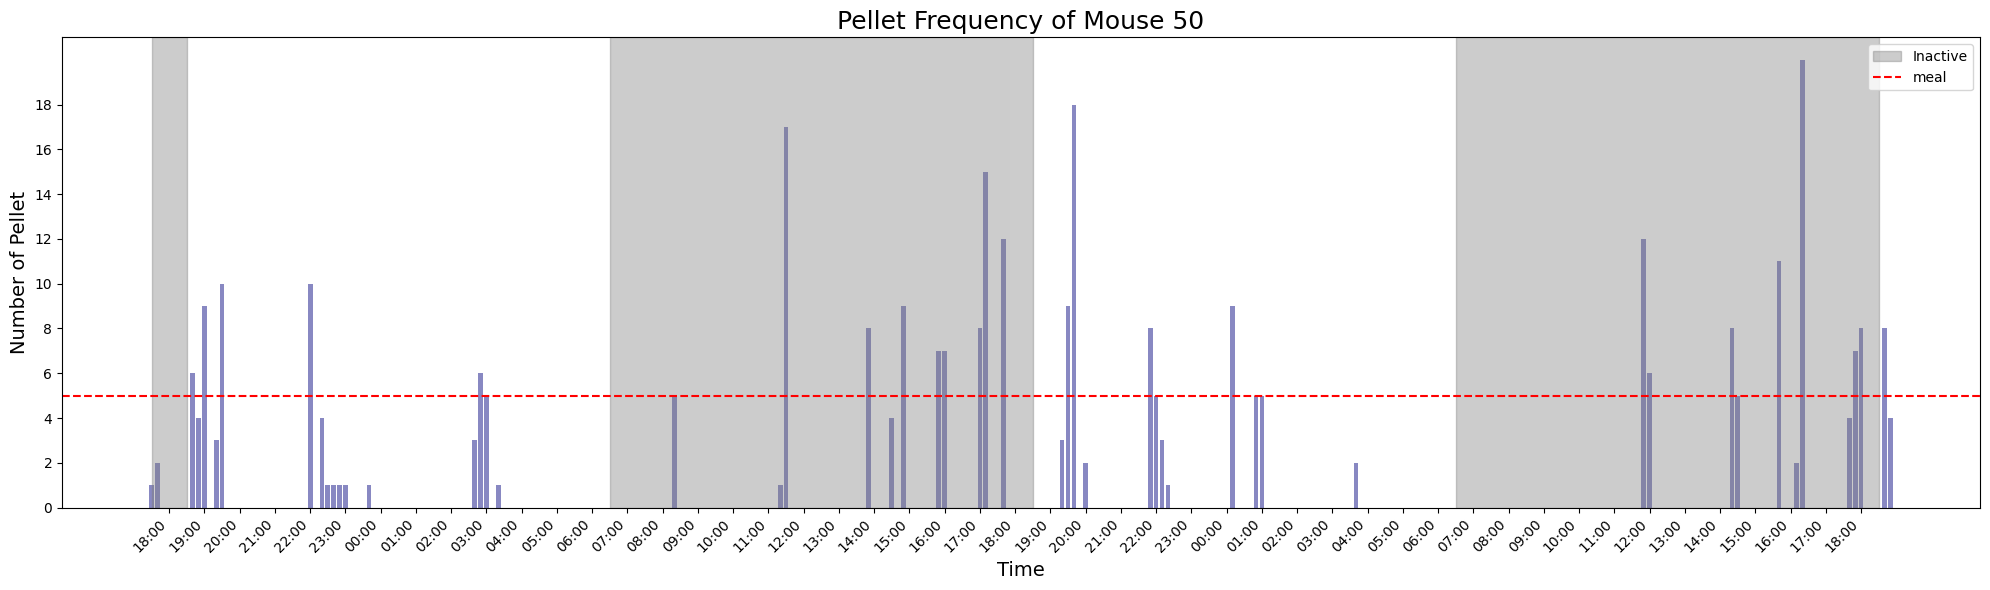

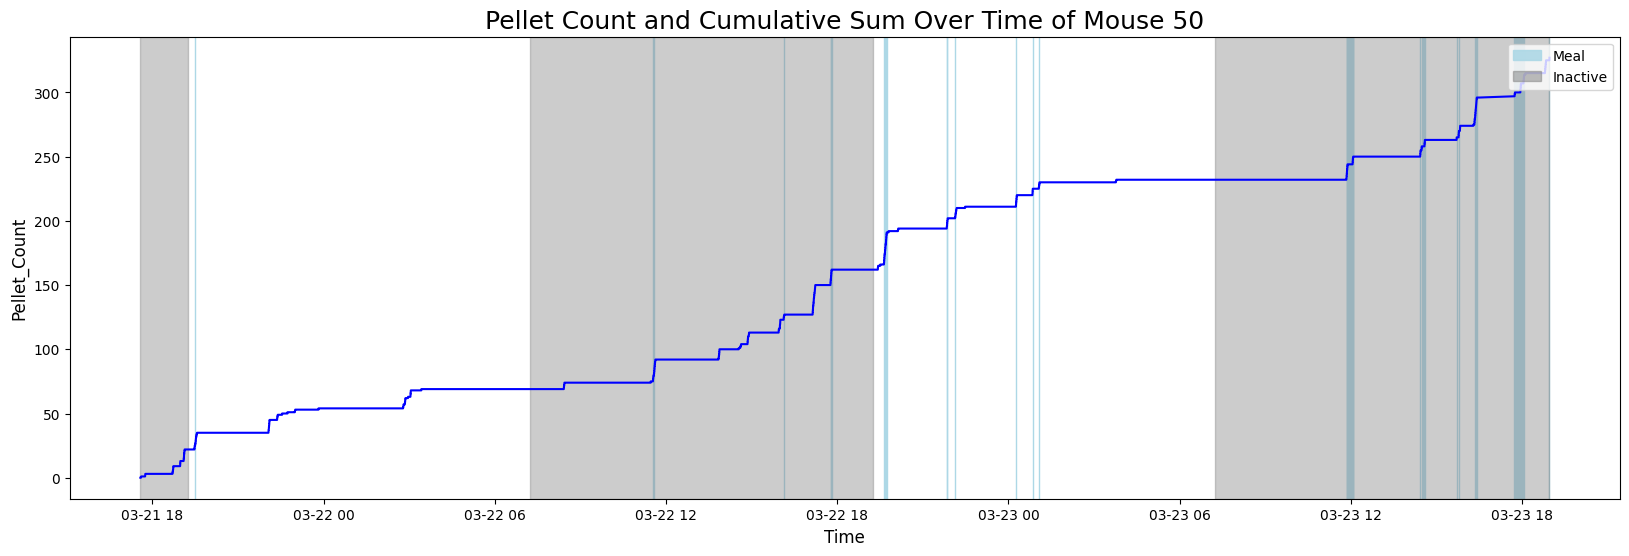

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/41/Reversal/FED000_032124_01.CSV


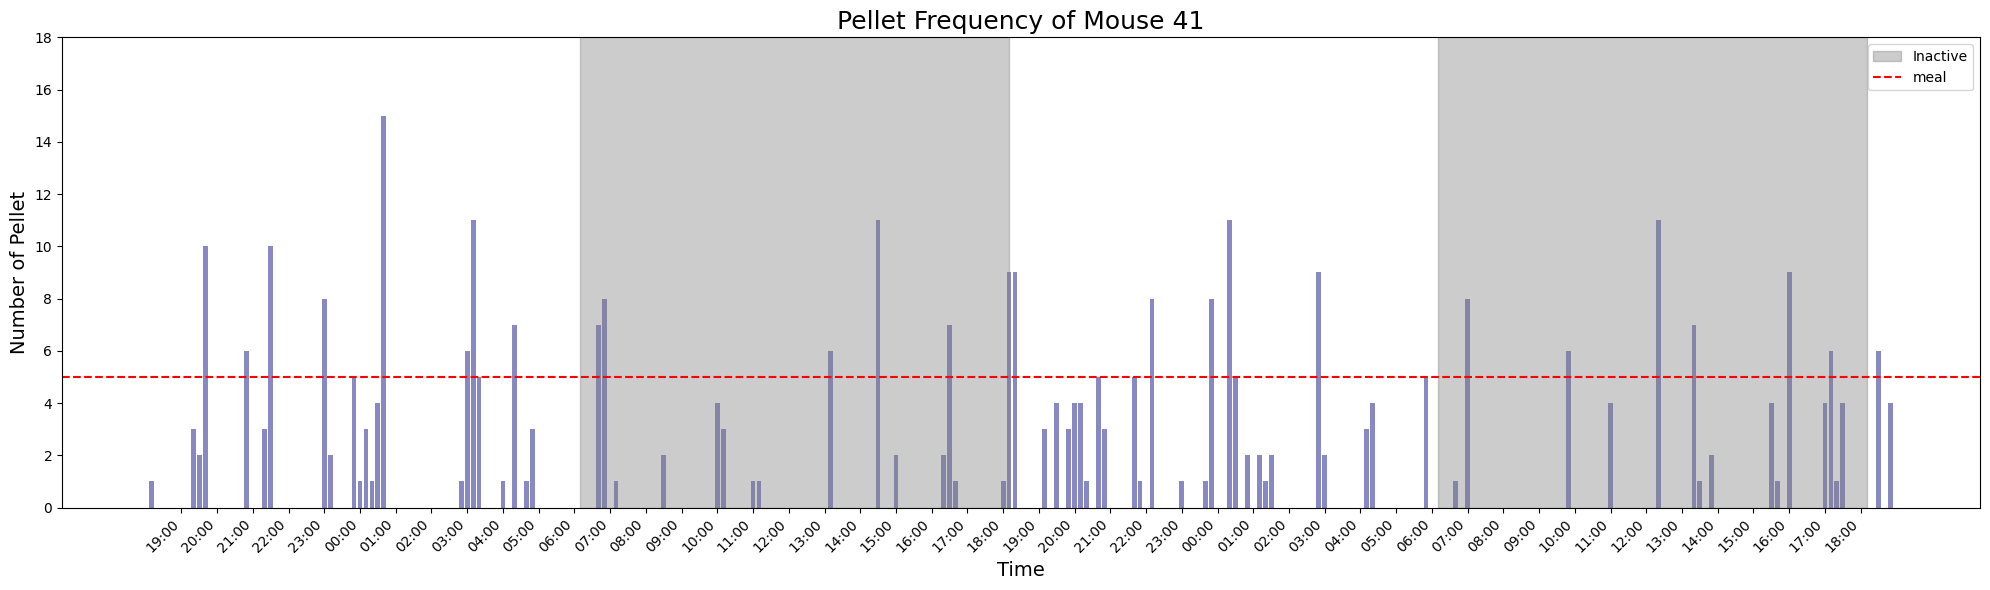

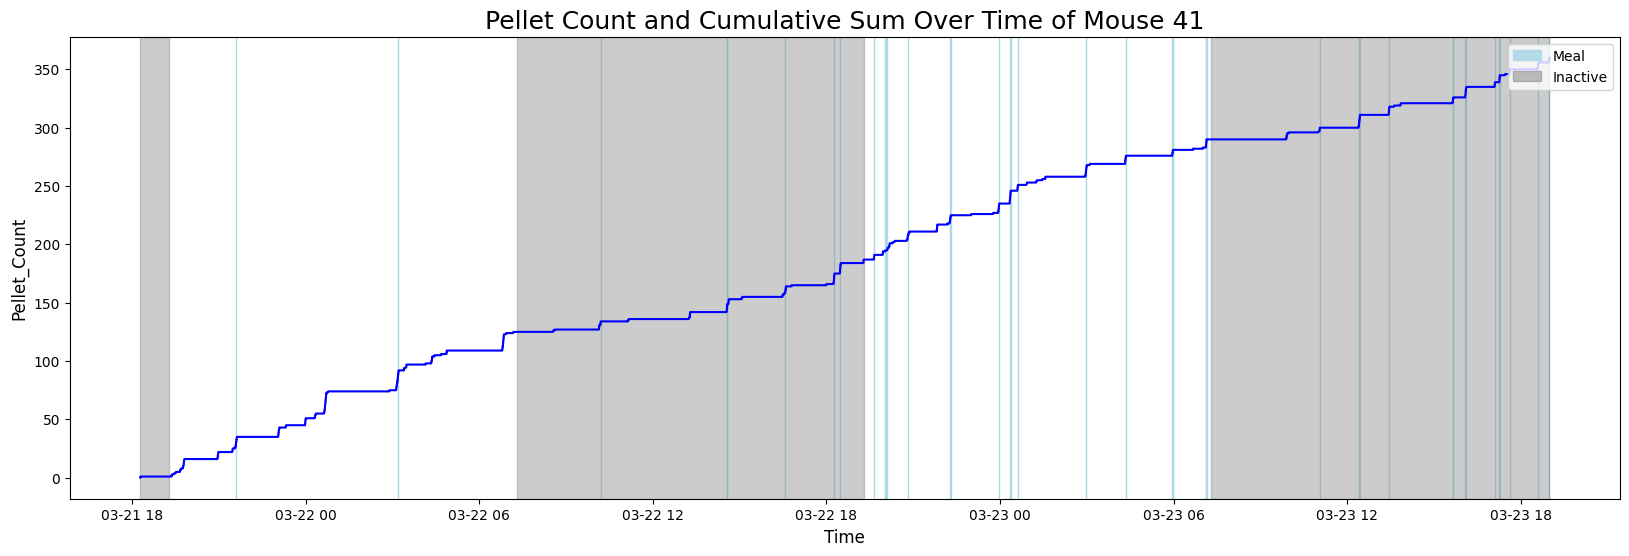

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/53/Reversal/FED000_032124_02.CSV


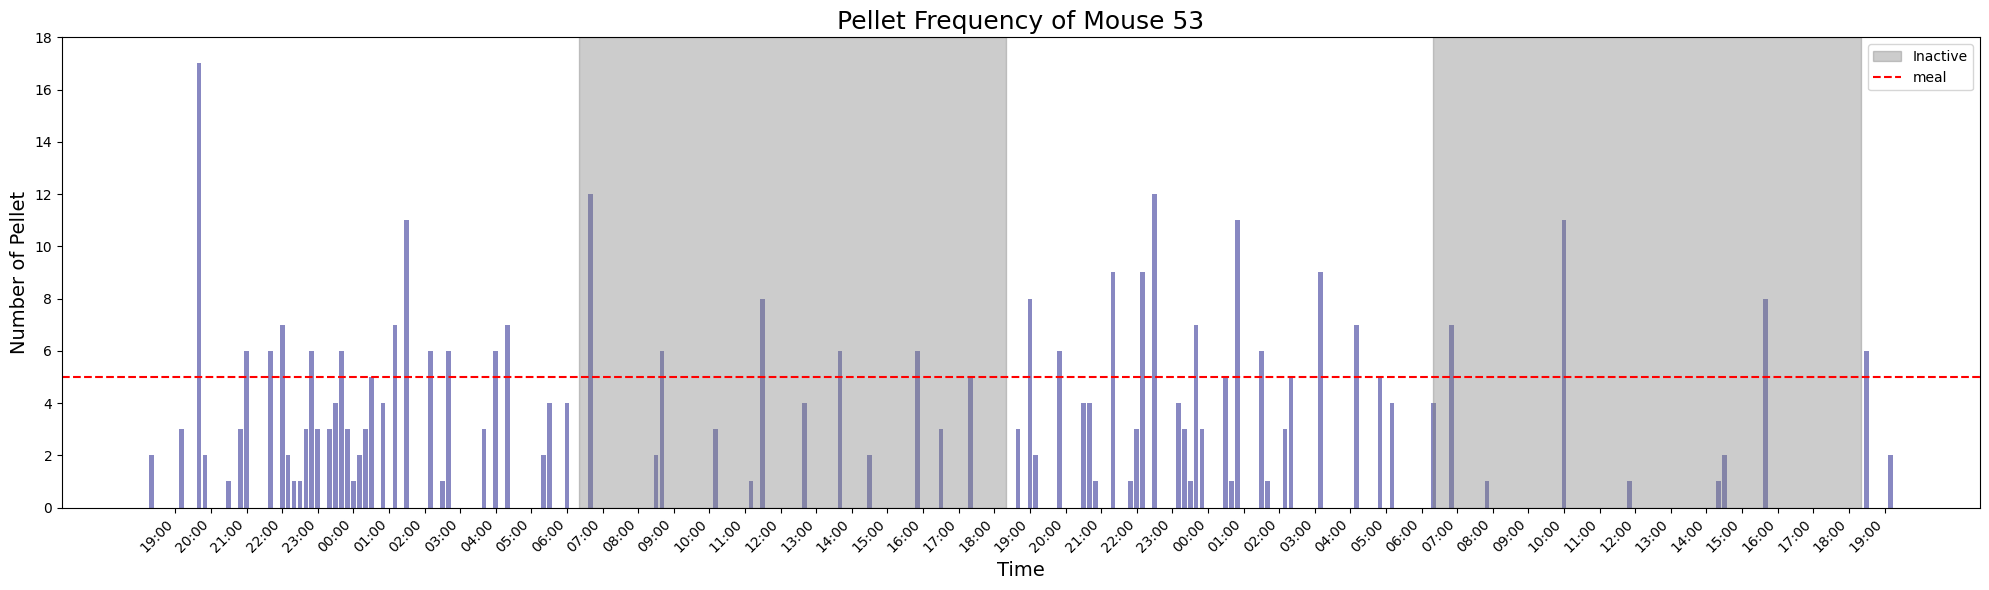

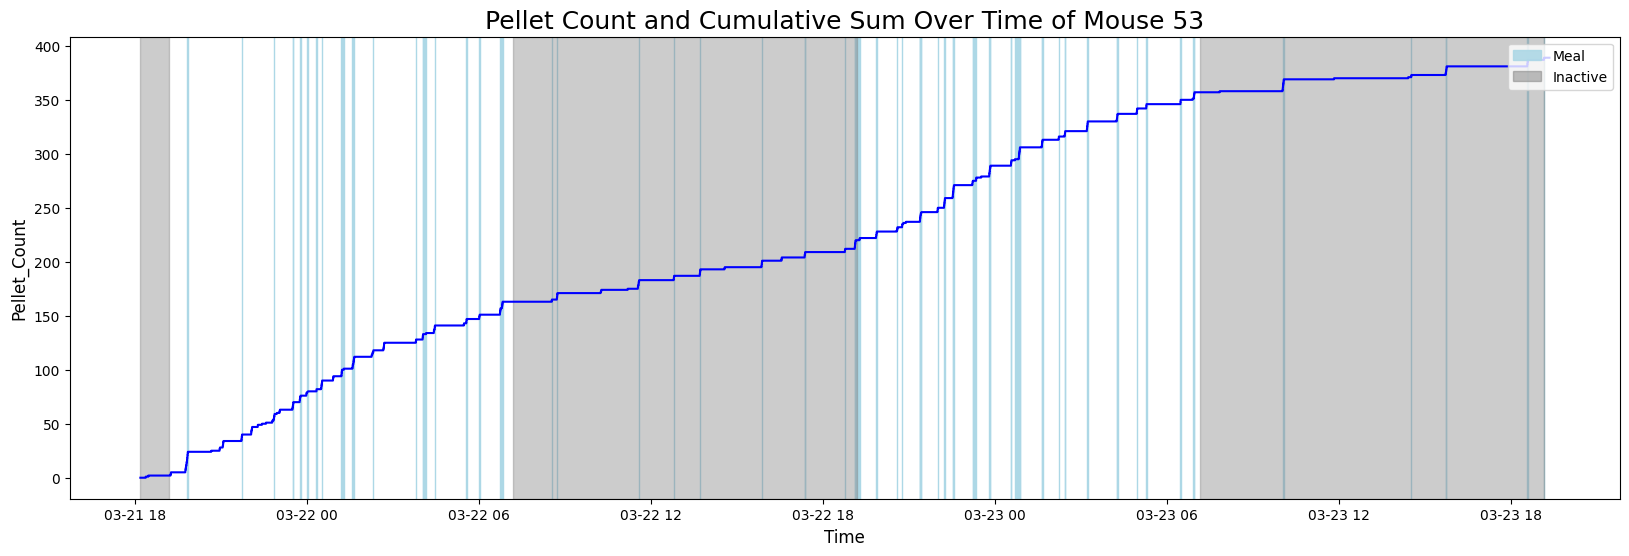

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/44/Reversal/FED000_032124_03.CSV


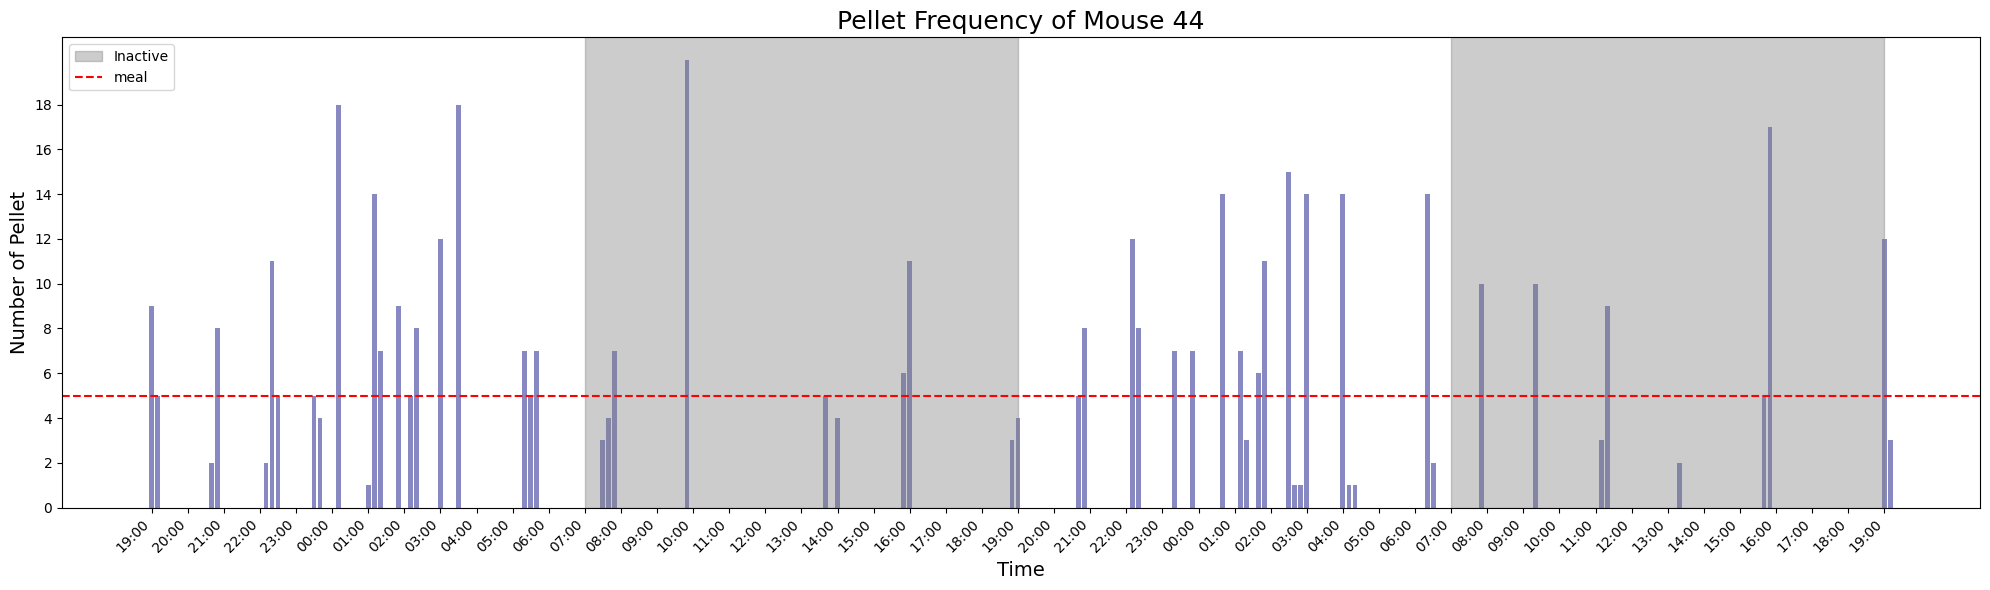

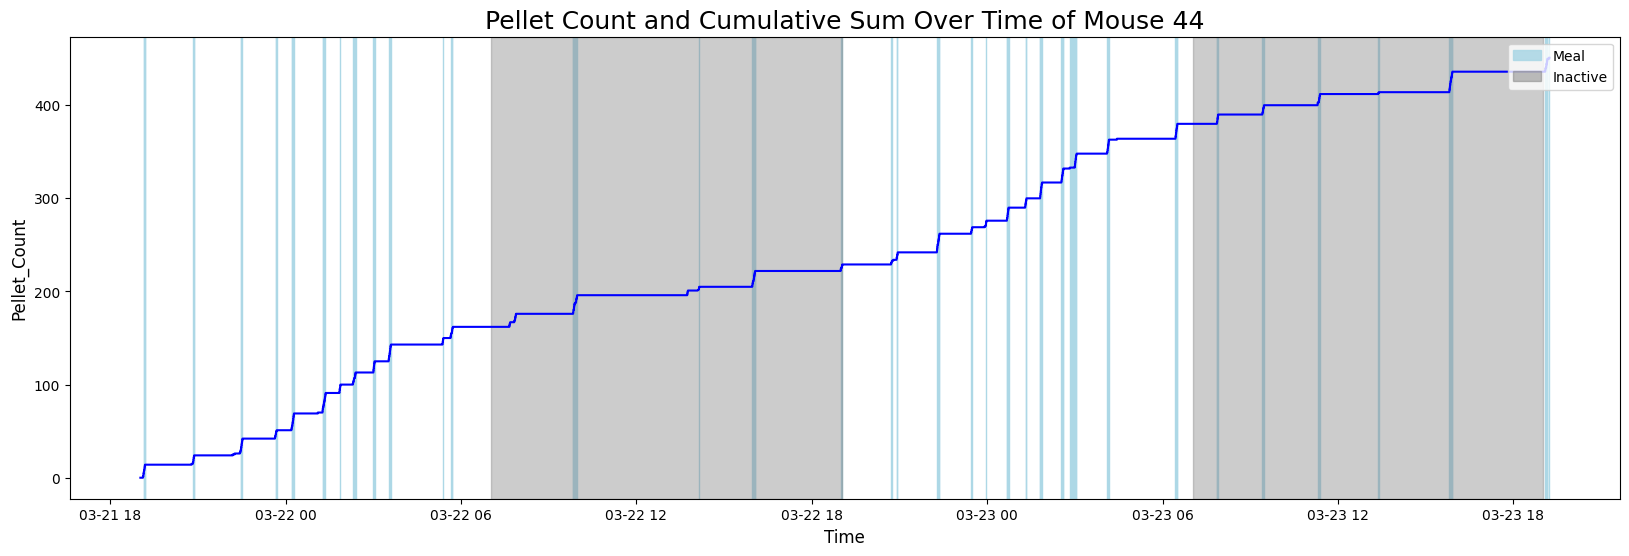

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/51/Reversal/FED000_032124_04.CSV


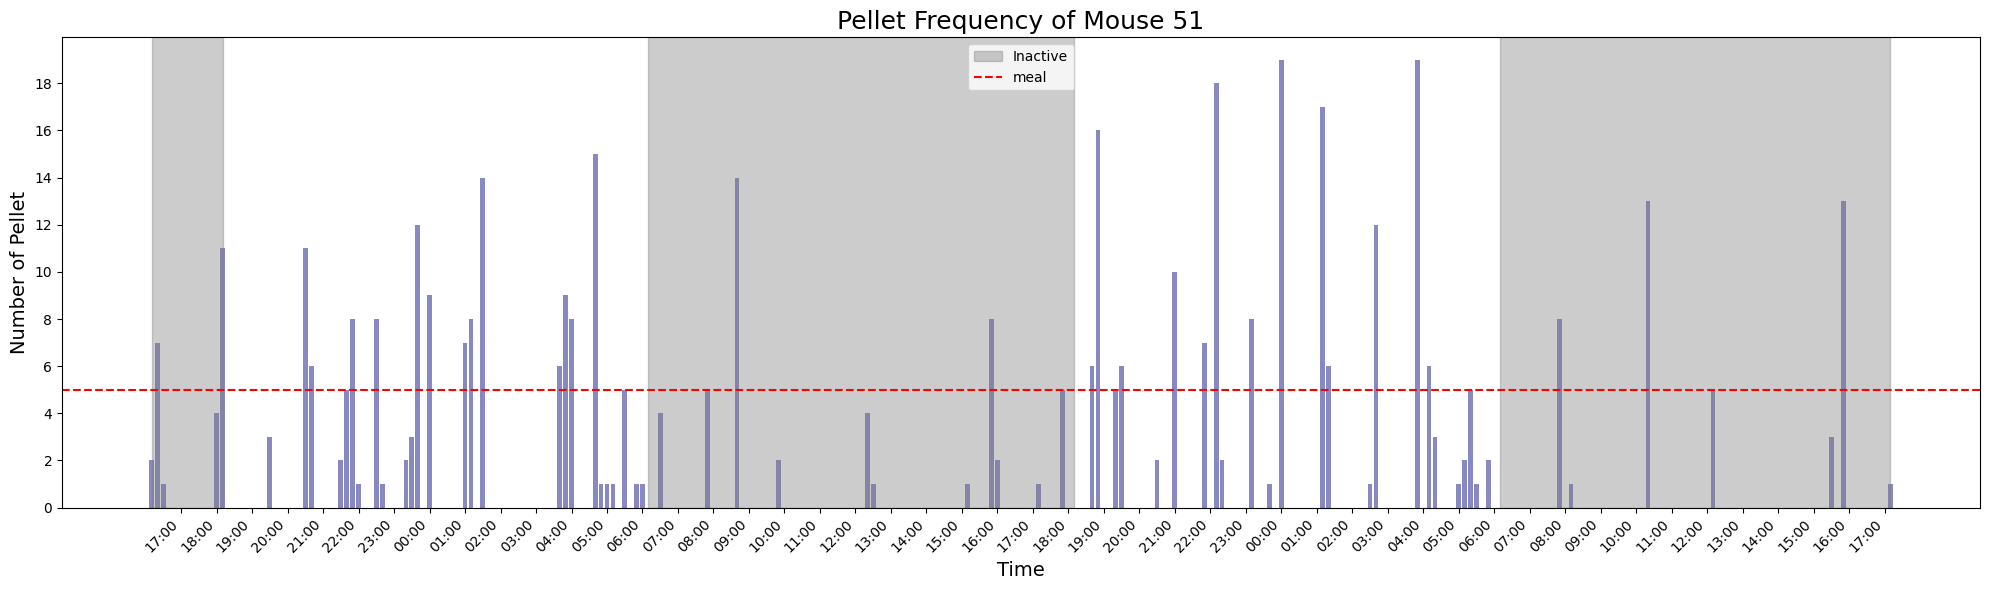

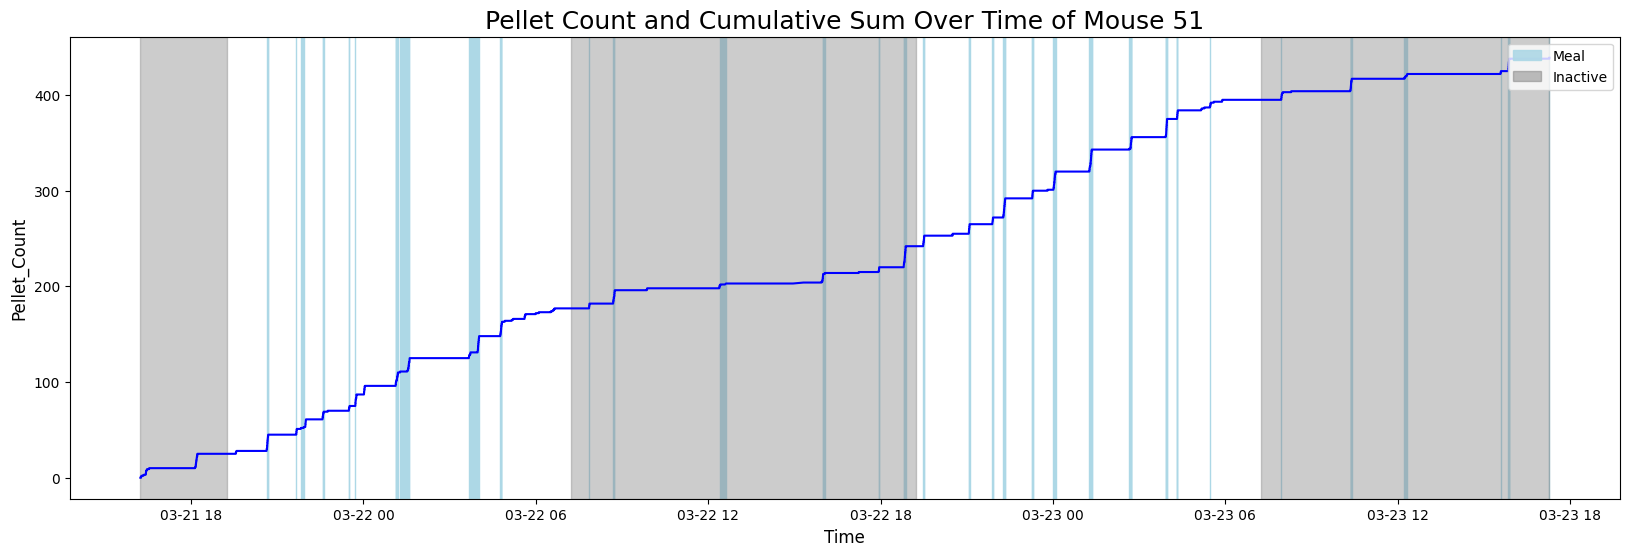

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/45/Reversal/FED000_032124_13.CSV


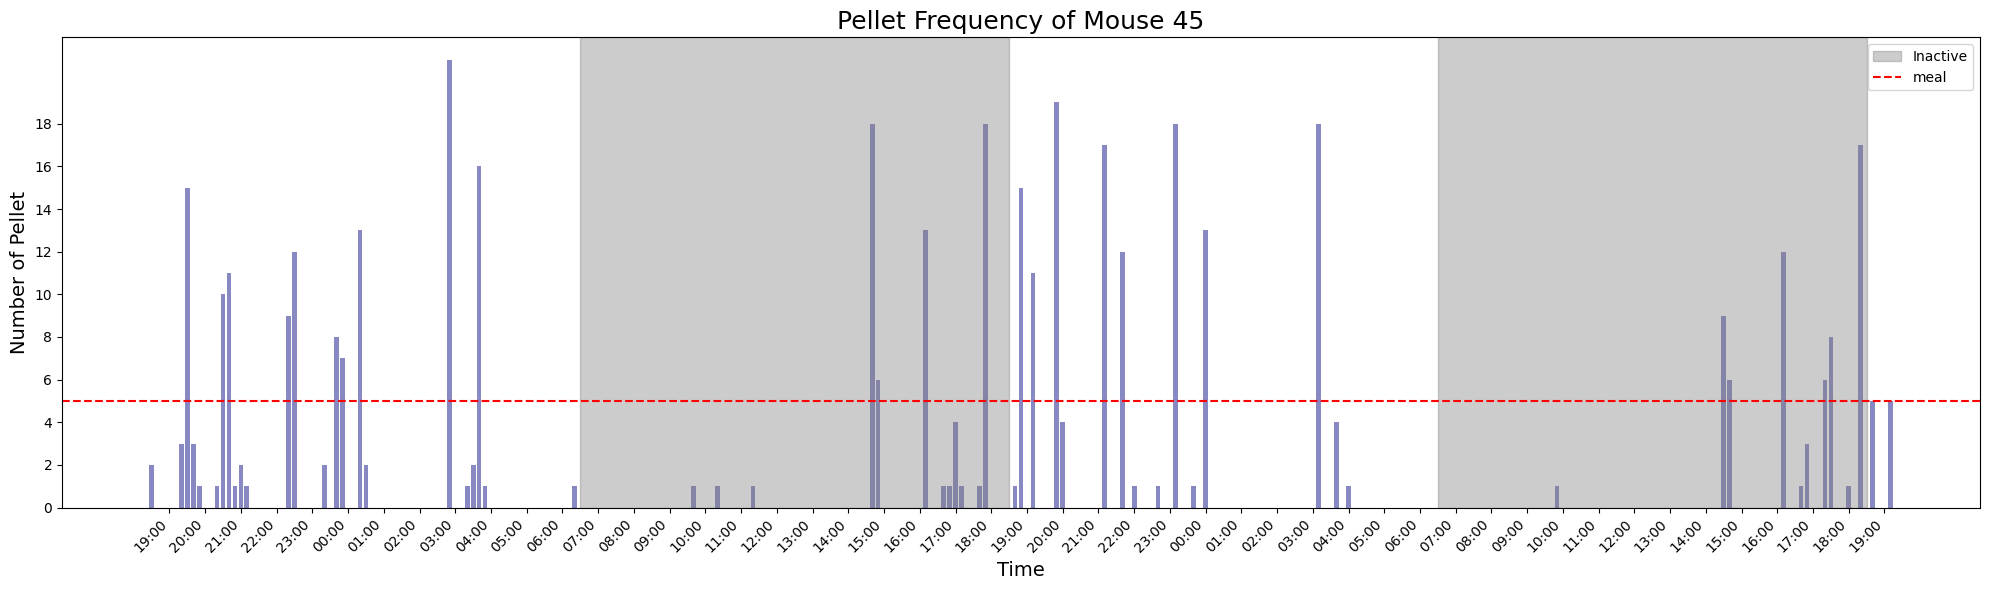

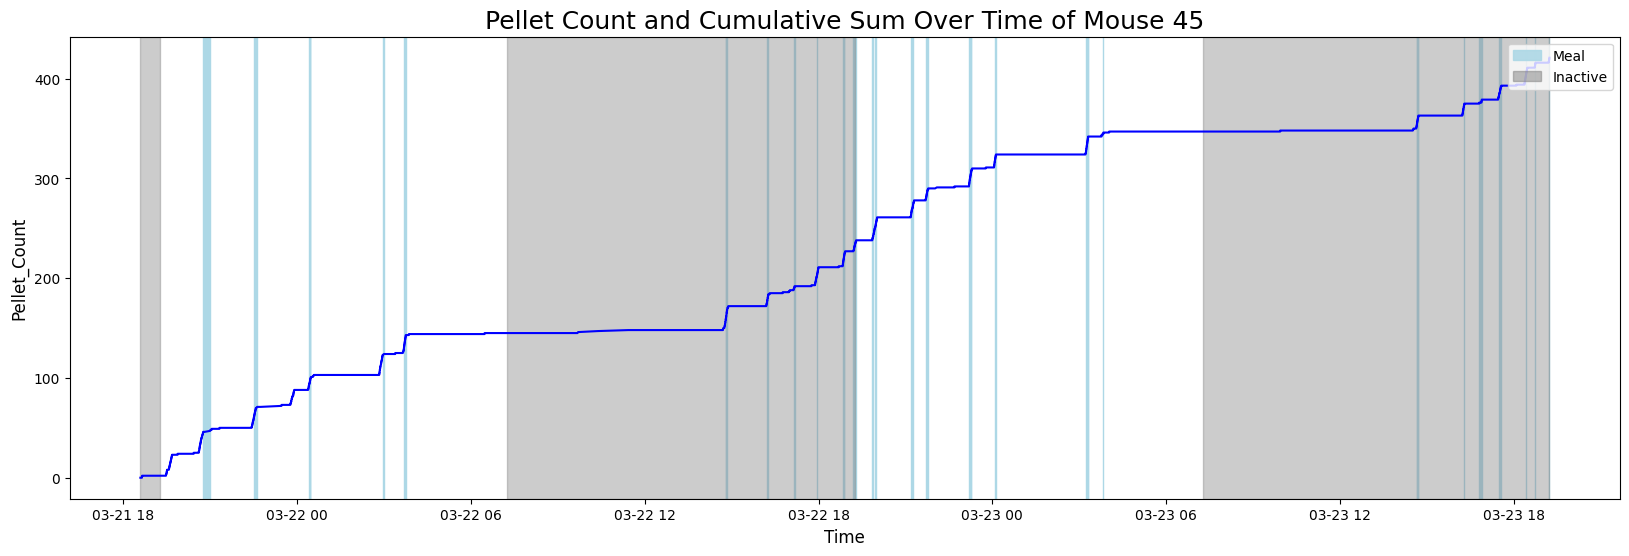

In [28]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
ctrl_meal_count = []

for path in paths.reversal_ivsa_ctrl:
    # try:
        print(path)
        data = read_csv_clean(path, remove_trivial=False, collect_time=True)
        # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
        #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
        meal = ml.find_meals_paper(data, time_threshold=20)
        group = ml.pellet_flip(data)
        num = tl.get_bhv_num(path)[0]
        avg = round(len(meal) / ml.experiment_duration(data), 2)
        ctrl_meal_count.append(avg)
        ctrl_avg_pellet.append(ml.average_pellet(group))
        ctrl_dark_meals.append(ml.active_meal(meal))
        meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
        ctrl_fir_meal.append(meal_1)
        ml.graph_pellet_frequency(group, None, num)
        ml.graphing_cum_count(data, meal, None, num, flip=True)
    # except:
    #     pass

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/54/Reversal/FED000_032124_07.CSV


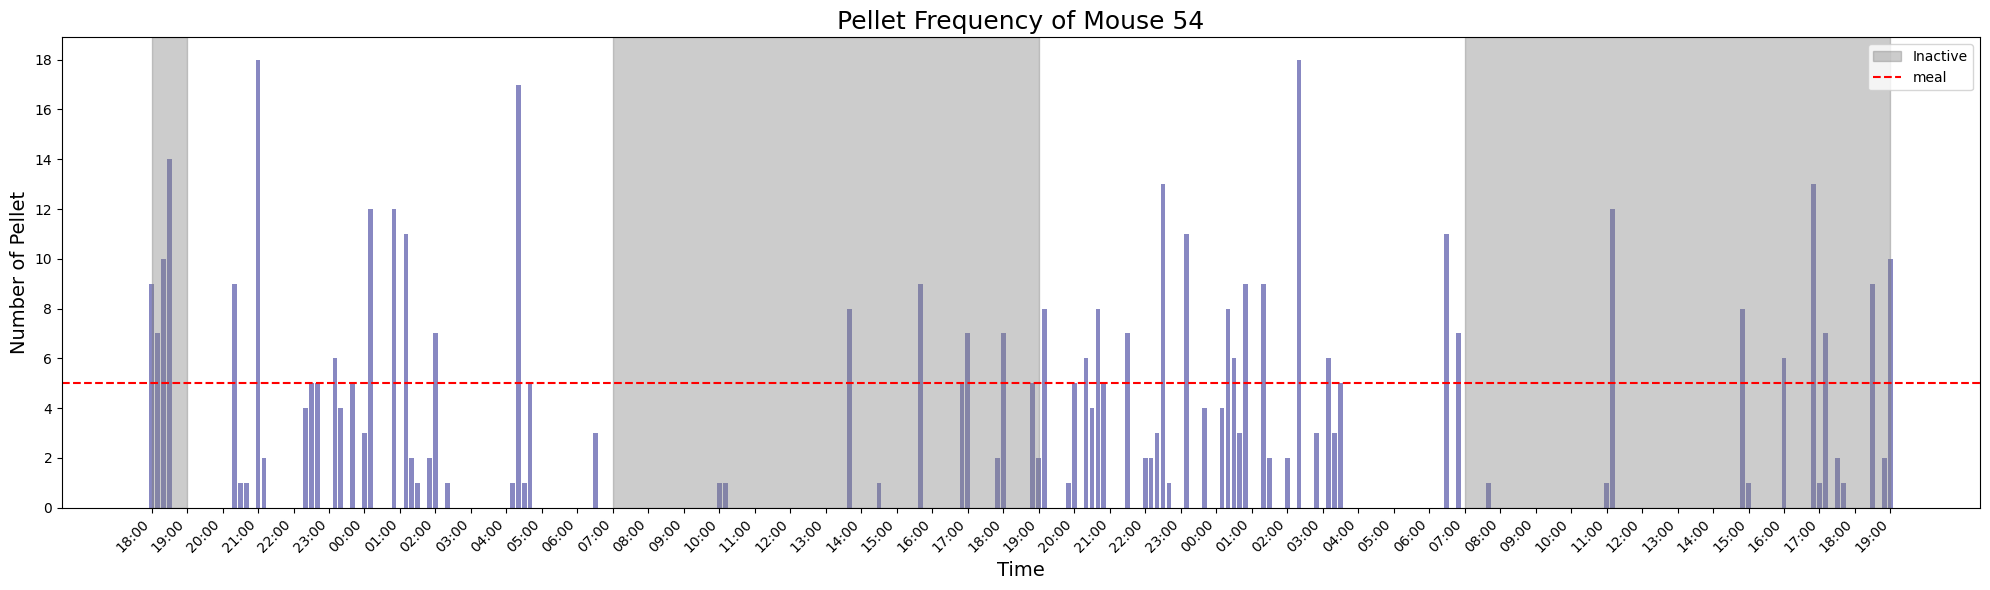

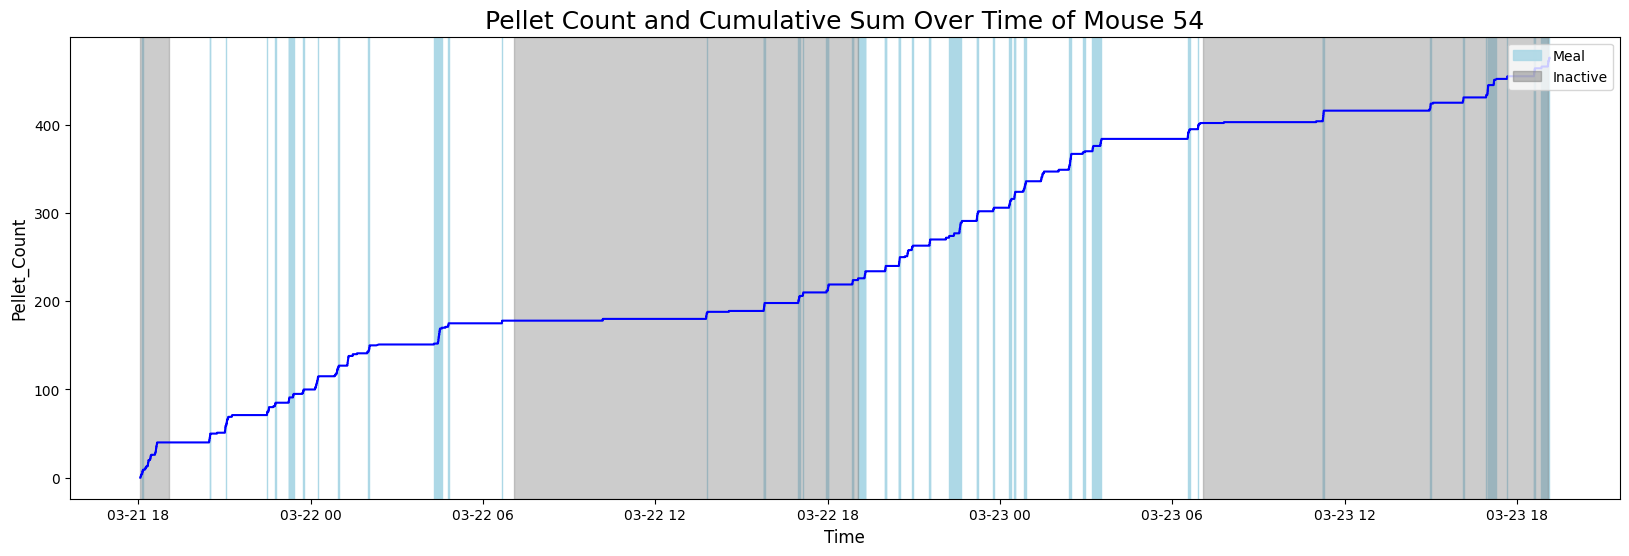

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/55/Reversal/FED000_032124_04.CSV


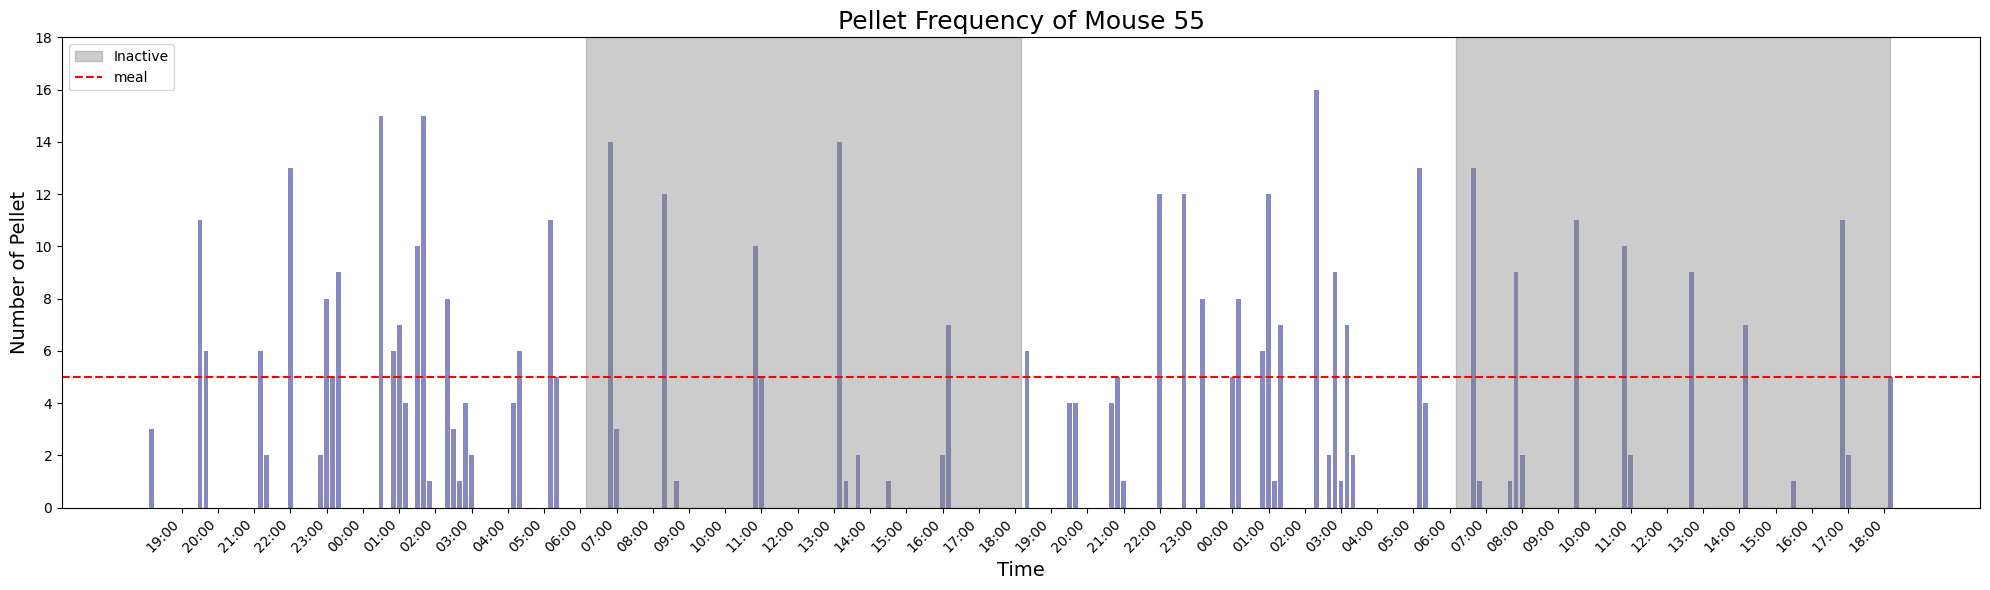

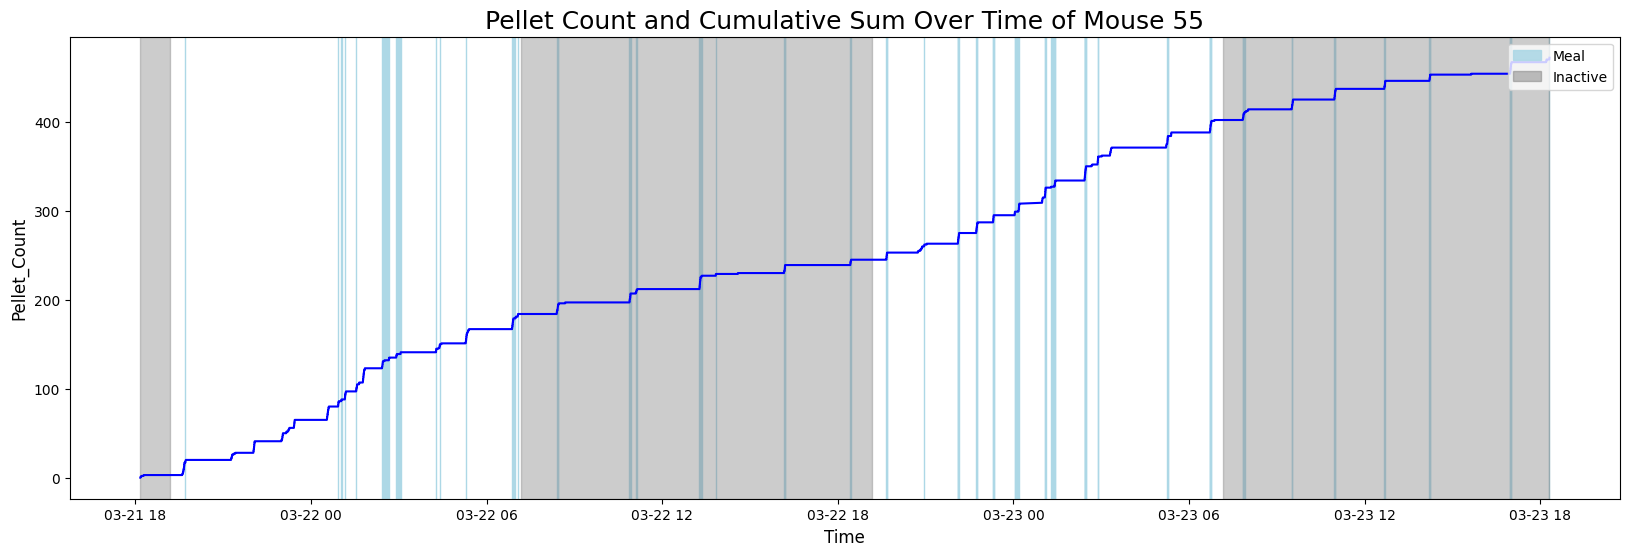

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/46/Reversal/FED000_032224_03.CSV


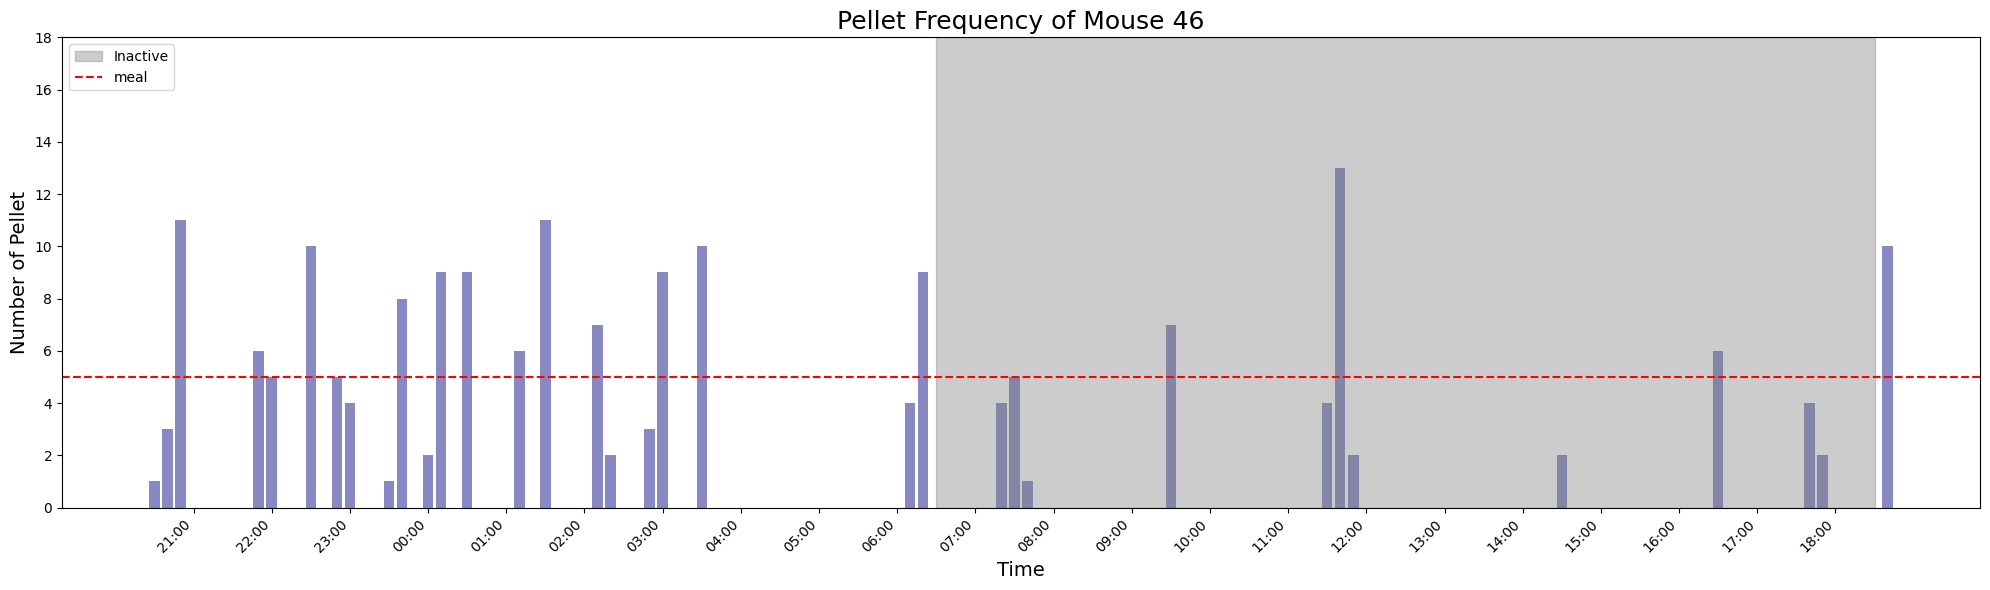

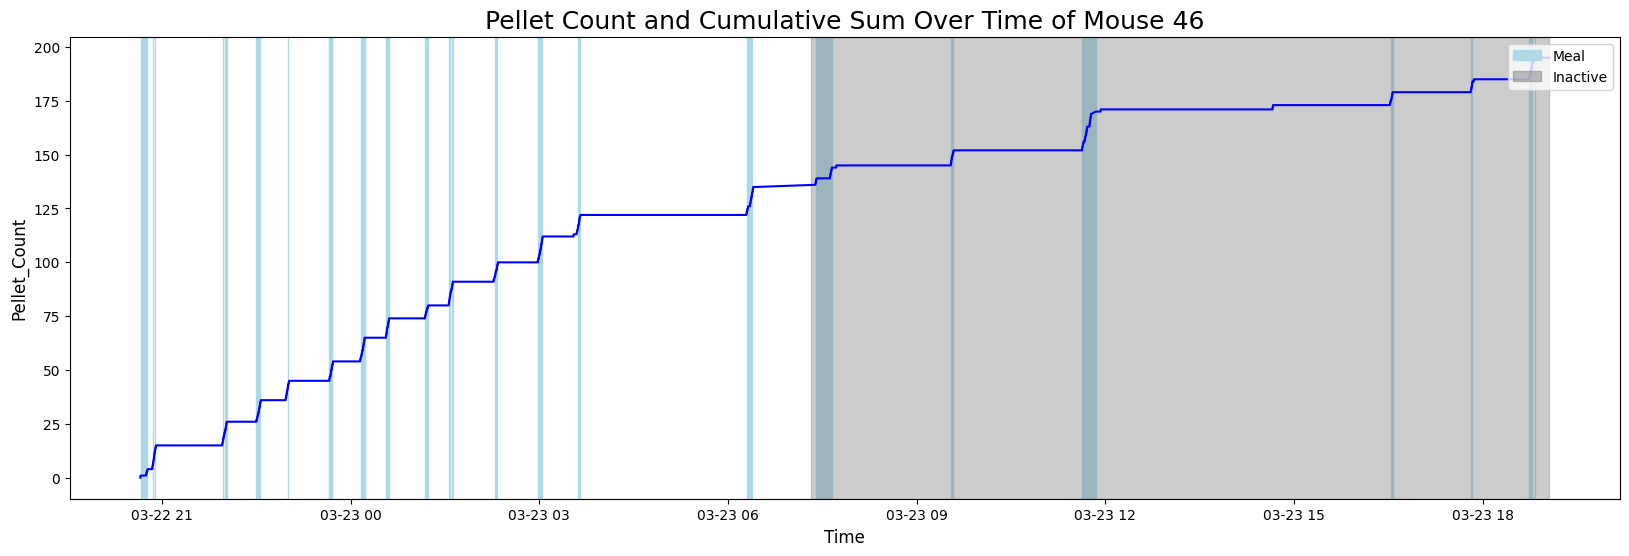

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/47/Reversal/FED000_032124_02.CSV


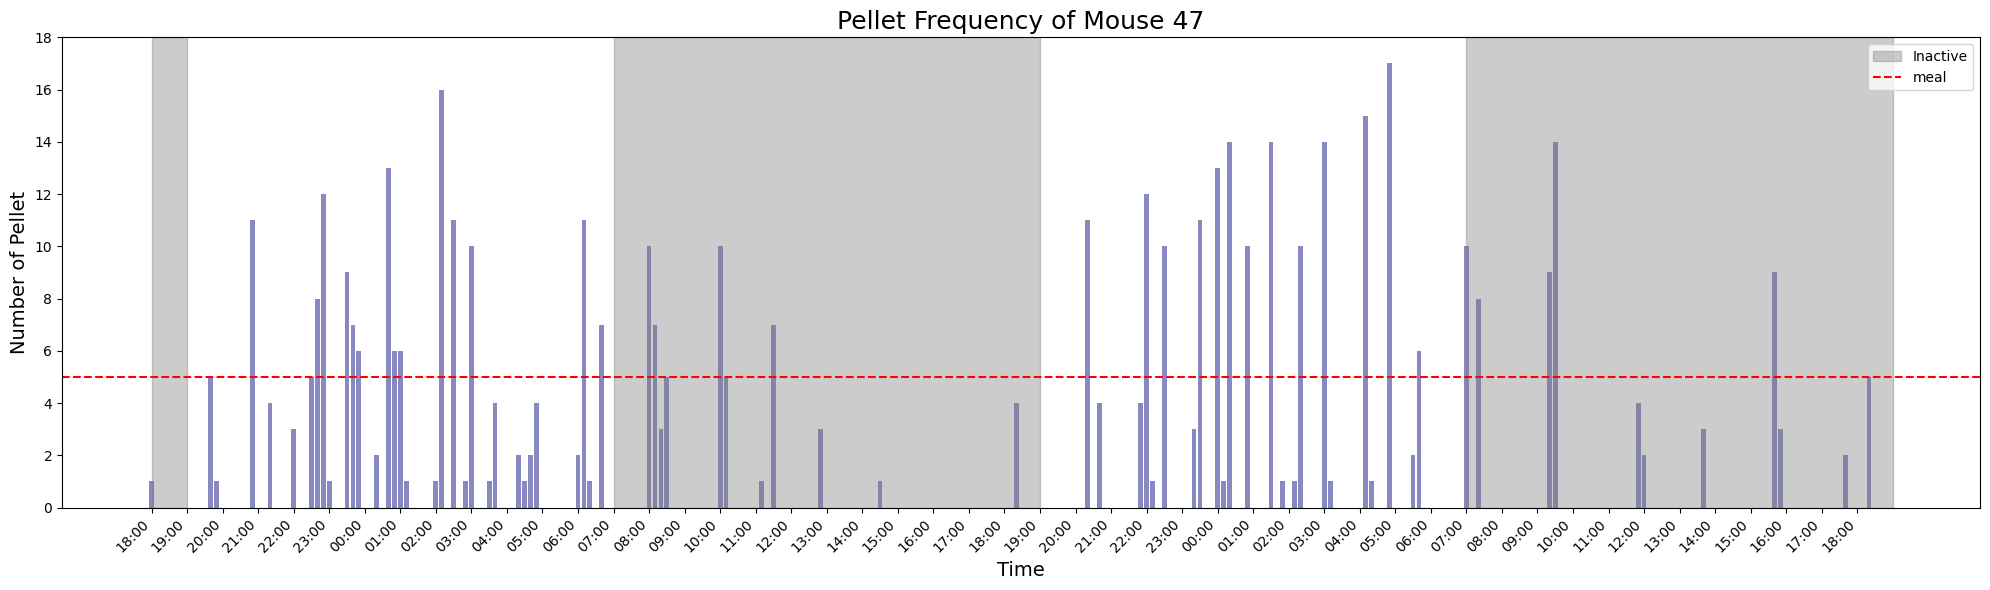

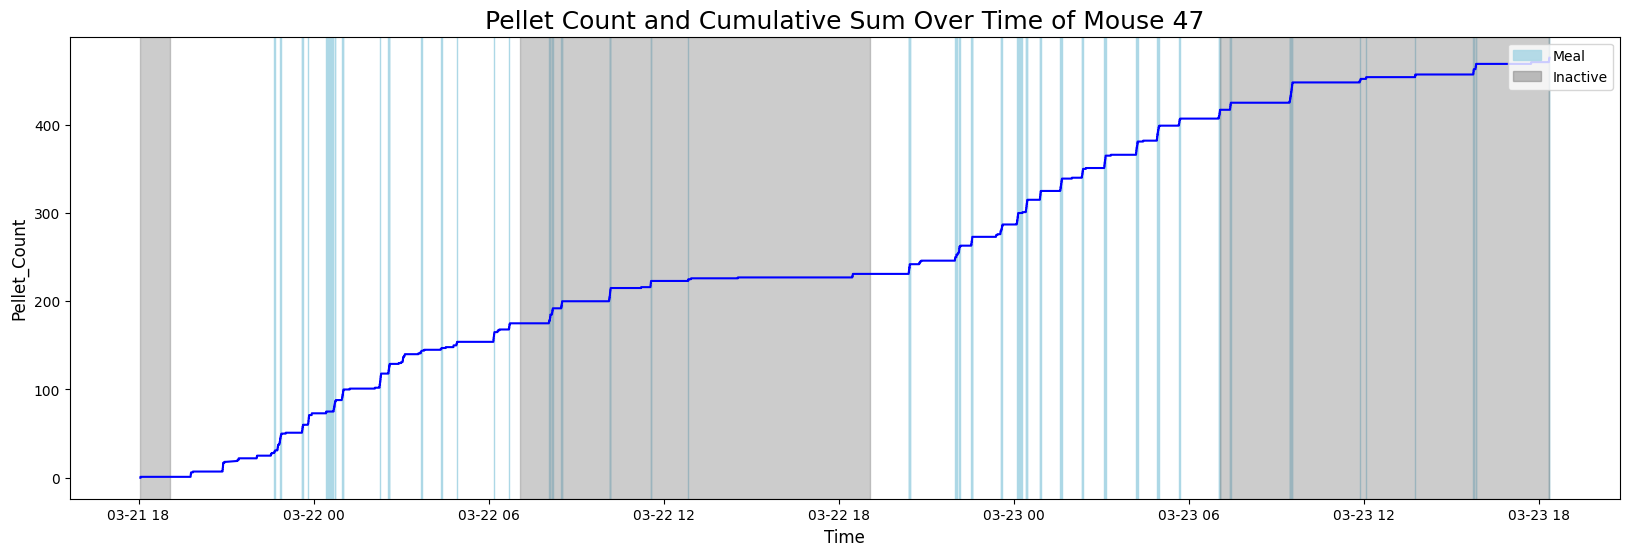

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/57/Reversal/FED000_032124_03.CSV


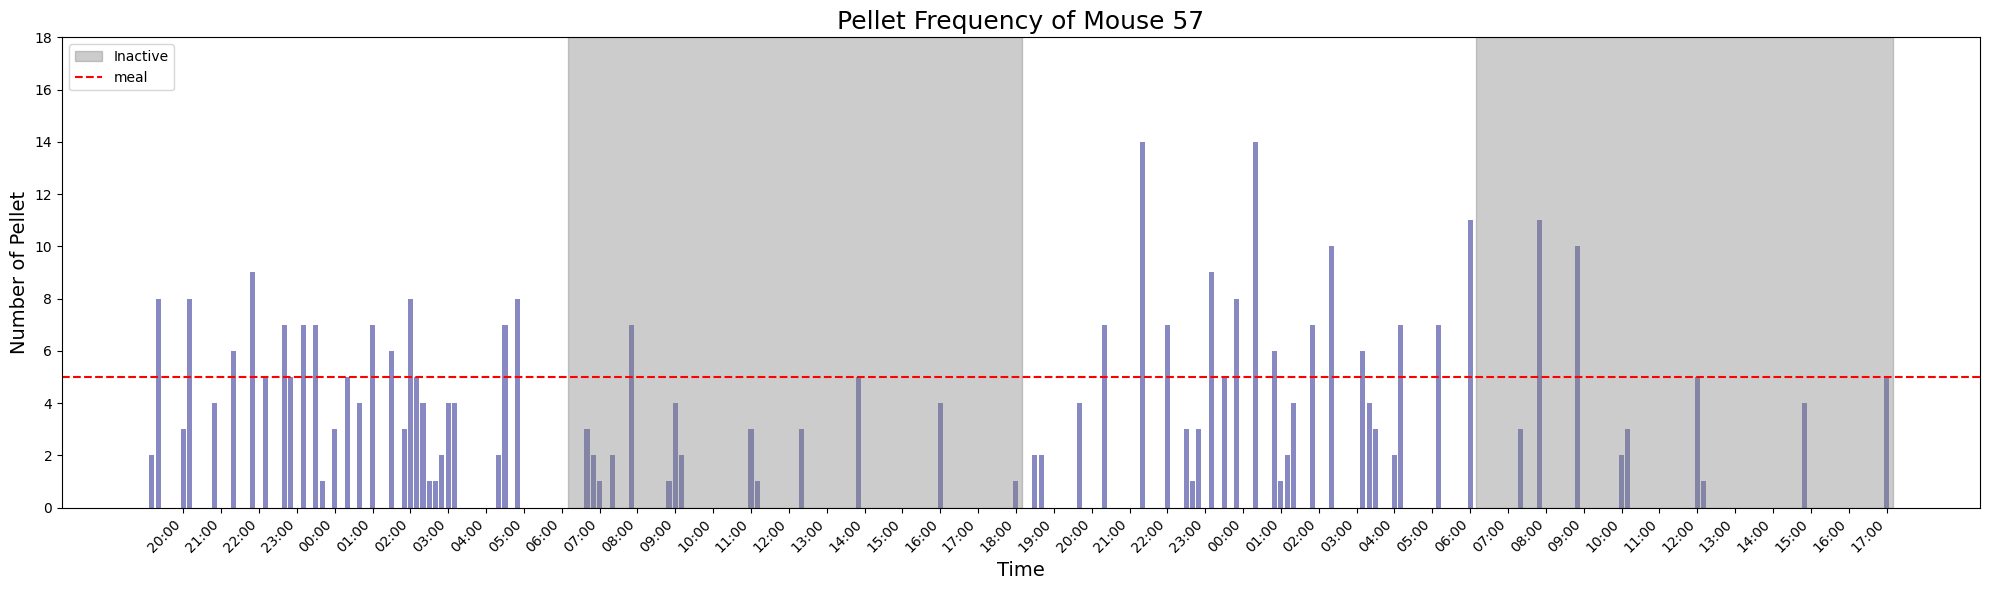

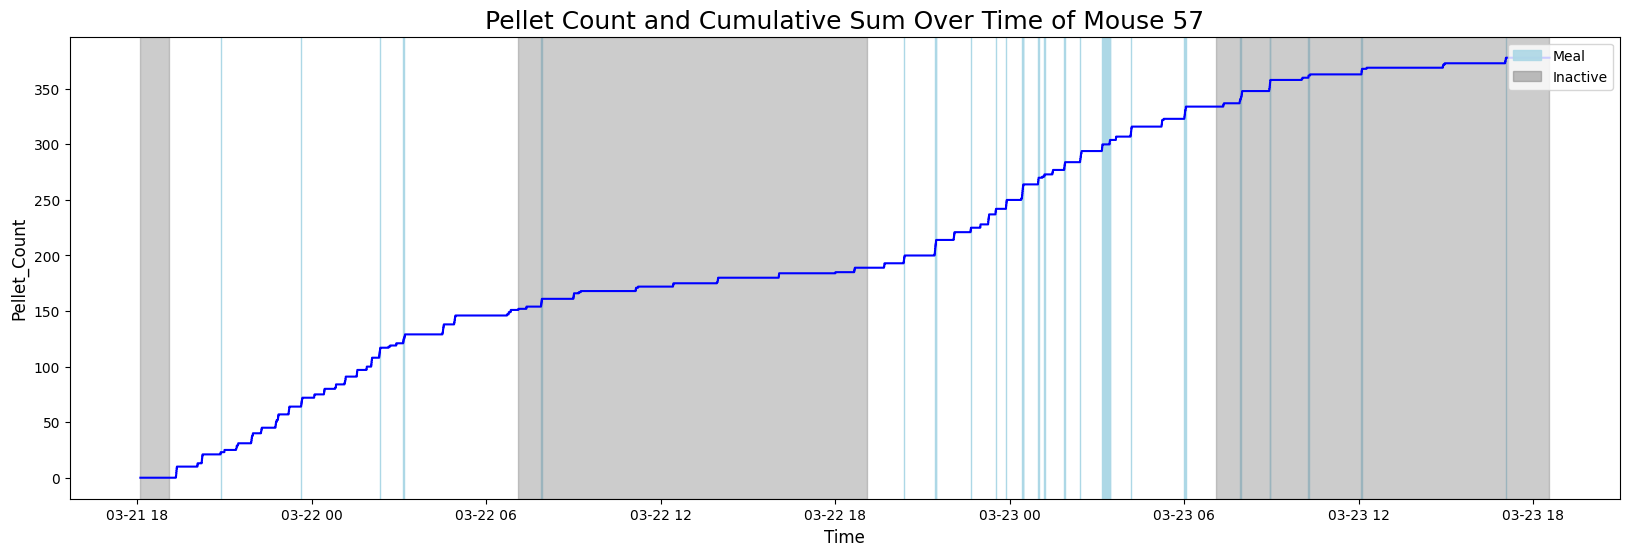

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/49/Reversal/FED000_032124_05.CSV


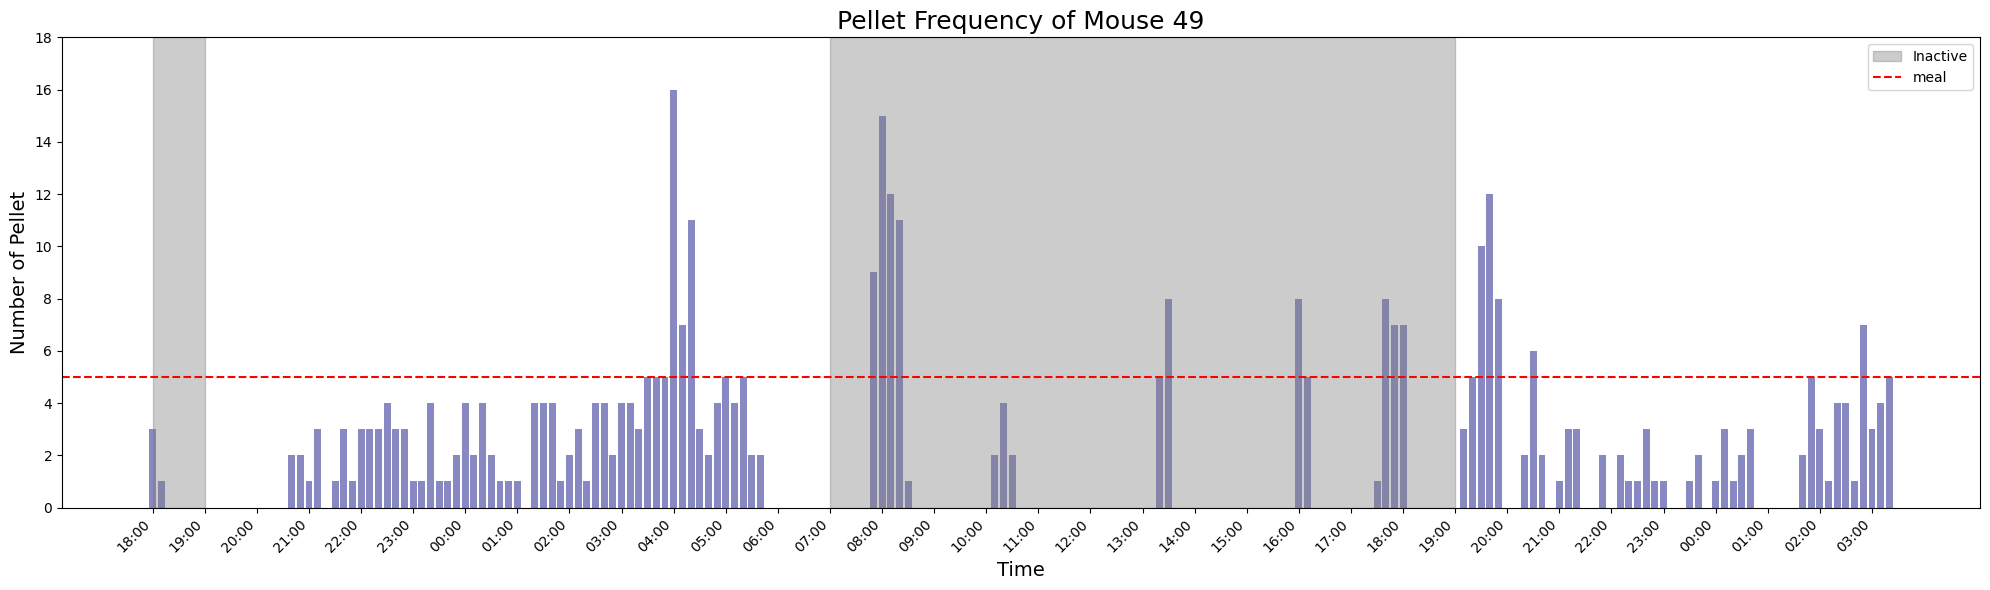

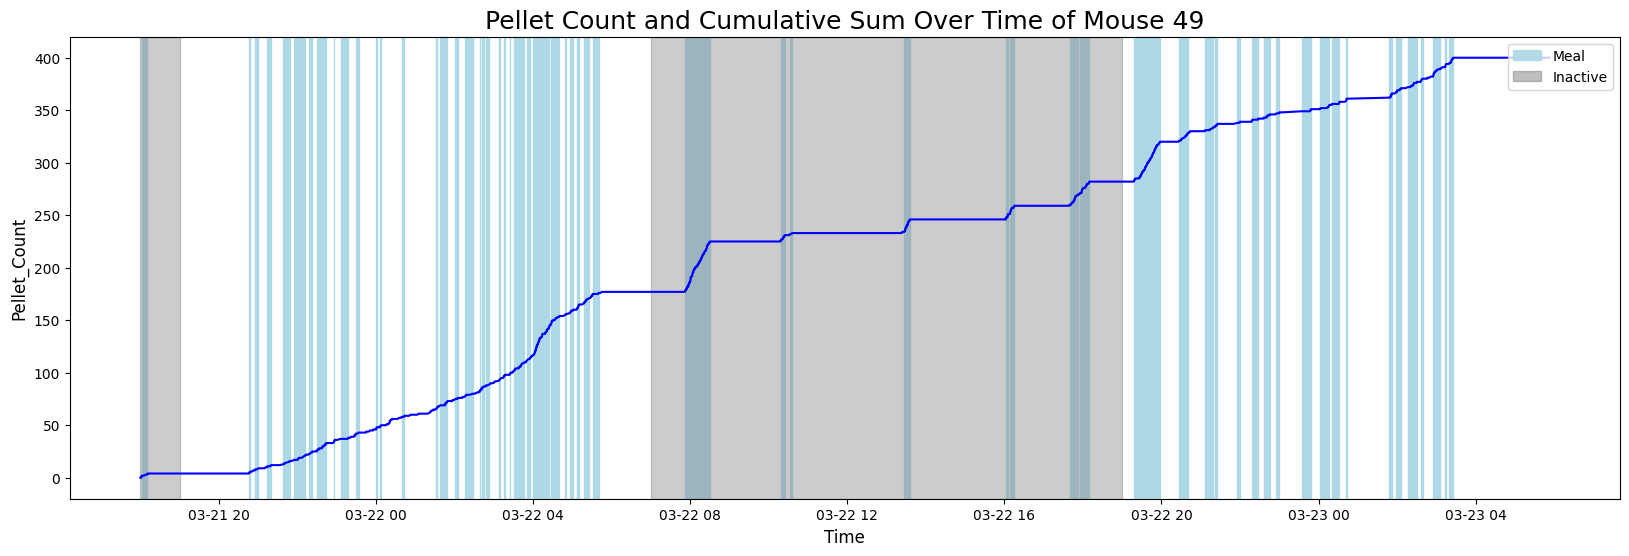

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/56/Reversal/FED000_032124_02.CSV


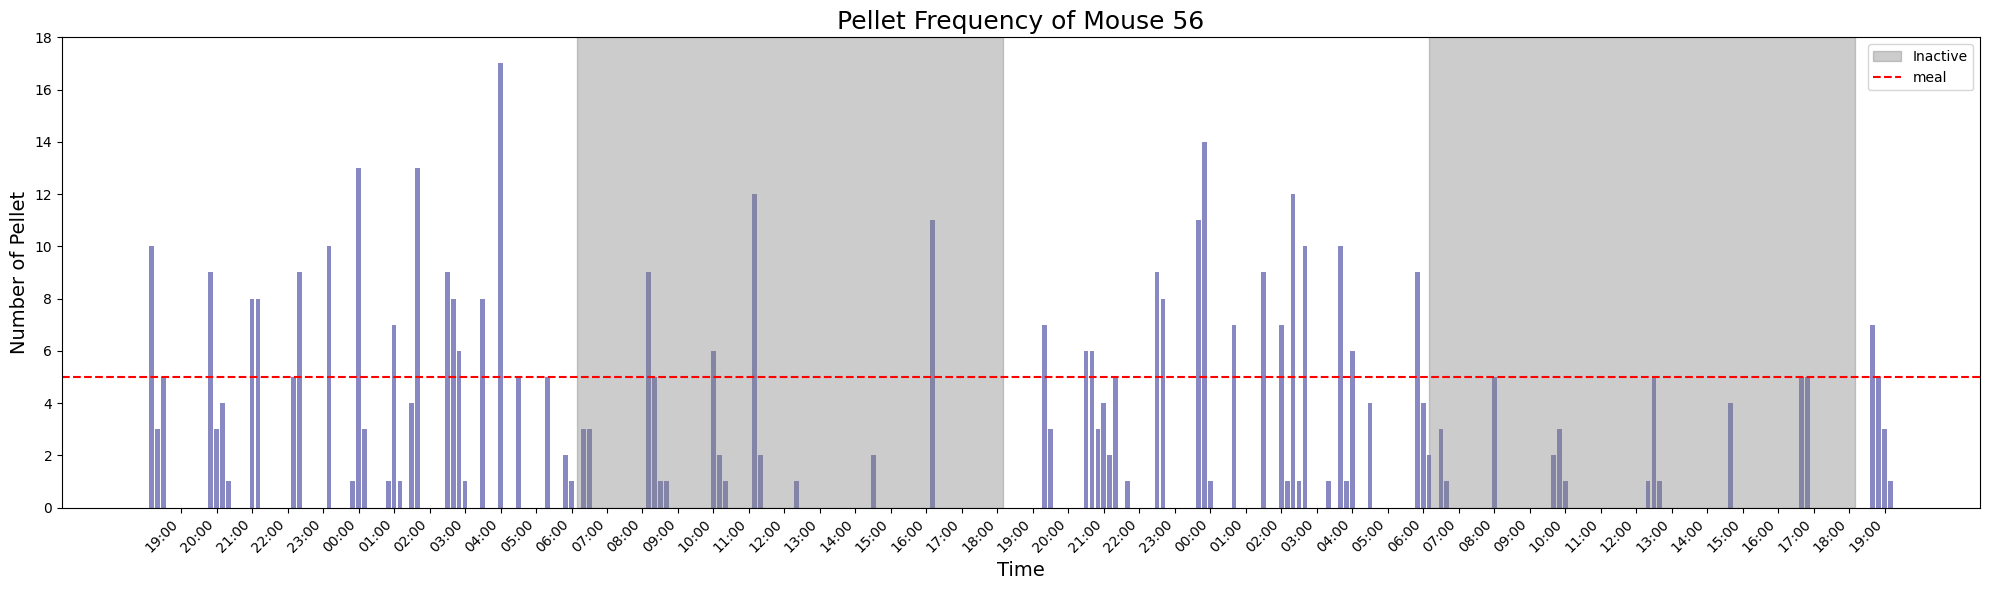

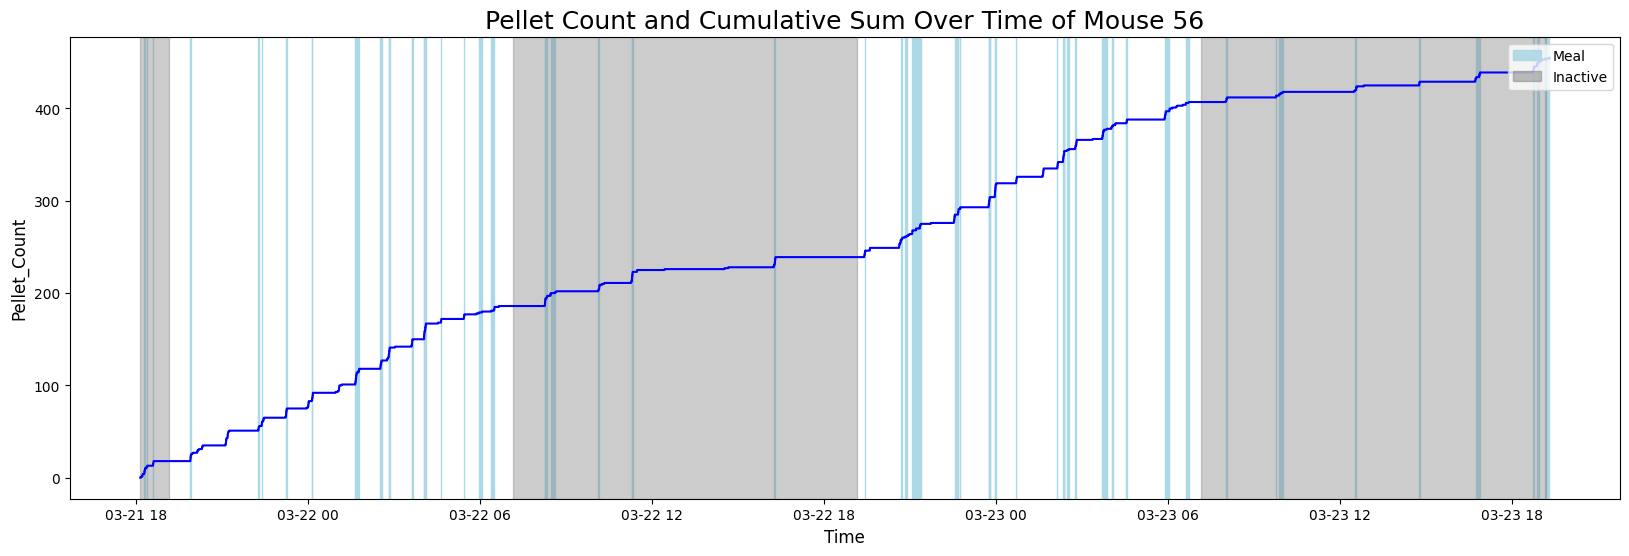

In [29]:
exp_avg_pellet = [] # pellet per hour
exp_dark_meals = [] # percentage of meals in inactive/dark phase
exp_fir_meal = []
exp_meal_count = []

for path in paths.reversal_ivsa_exp:
    print(path)
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
    #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
    meal = ml.find_meals_paper(data, time_threshold=20)
    group = ml.pellet_flip(data)
    num = tl.get_bhv_num(path)[0]           
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    exp_meal_count.append(avg)
    exp_avg_pellet.append(ml.average_pellet(group))
    exp_dark_meals.append(ml.active_meal(meal))
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    exp_fir_meal.append(meal_1)
    ml.graph_pellet_frequency(group, None, num)
    ml.graphing_cum_count(data, meal, None, num, flip=True)

In [30]:
ctrl_avg_pellet, exp_avg_pellet

([6.628, 7.397, 7.966, 9.363, 8.959, 8.651],
 [9.714, 9.833, 8.797, 9.848, 8.247, 12.0, 9.286])

In [31]:
invs.perform_T_test(ctrl_dark_meals, exp_dark_meals)

P Value is  0.23042812932672385
There is no significant difference between the two groups.


In [32]:
ctrl_meal_count, exp_meal_count

([17.98, 17.25, 38.06, 50.28, 45.51, 26.65],
 [43.53, 40.38, 48.21, 45.22, 15.85, 58.21, 41.03])

#### Meal Count

In [33]:
invs.perform_T_test(ctrl_meal_count, exp_meal_count)

P Value is  0.2473190069957769
There is no significant difference between the two groups.


#### Average Pellet

In [34]:
invs.perform_T_test(ctrl_avg_pellet, exp_avg_pellet, test_side='greater')

P Value is  0.016484671801691175
Experiment group is significantly greater than control group


Control Size: 6
PICA Size: 7
Control Average: 8.160666666666666
PICA Average: 9.674999999999999
Control Standard Deviation: 1.028933169193542
PICA Standard Deviation: 1.1848648305467873


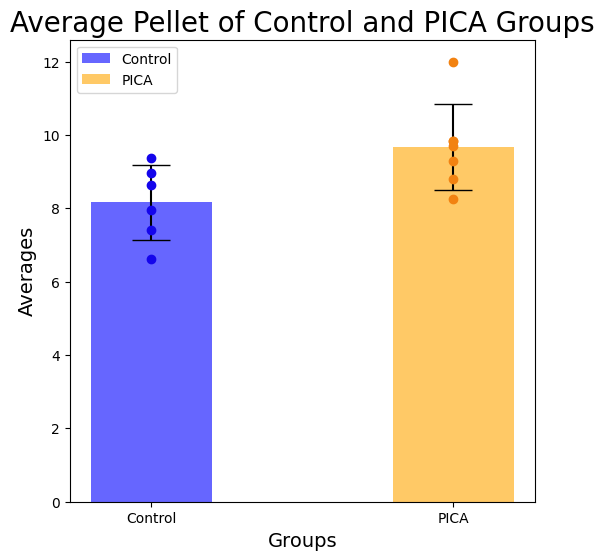

In [35]:
ml.graph_group_stats(ctrl_avg_pellet, exp_avg_pellet, stats_name='Average Pellet', exp_name='PICA')

#### First Meal Time

In [36]:
invs.perform_T_test(ctrl_fir_meal, exp_fir_meal)

P Value is  0.32425534195971495
There is no significant difference between the two groups.


Control Size: 6
PICA Size: 7
Control Average: 135.06944444444446
PICA Average: 78.28333333333332
Control Standard Deviation: 87.97285781968758
PICA Standard Deviation: 107.17503596142777


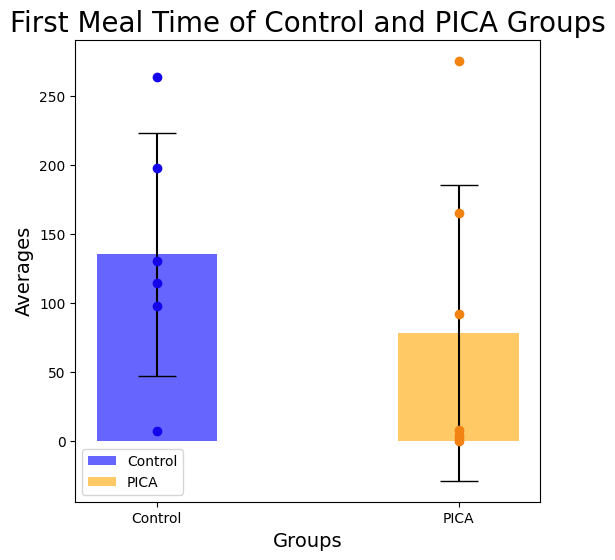

In [37]:
ml.graph_group_stats(ctrl_fir_meal, exp_fir_meal, stats_name='First Meal Time', exp_name='PICA')